# Creating final data for crop and fertilizer recommendation system

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [122]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,1,maize,80,40,20,5.5
2,2,chickpea,40,60,80,5.5
3,3,kidneybeans,20,60,20,5.5
4,4,pigeonpeas,20,60,20,5.5


In [124]:
del merge_fert['Unnamed: 0']

In [126]:
merge_fert.describe()

,N,P,K,pH
count,44.000000,44.000000,44.000000,44.000000
mean,50.454545,45.681818,48.181818,5.409091
std,35.890955,32.252473,51.093745,0.583421
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [128]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

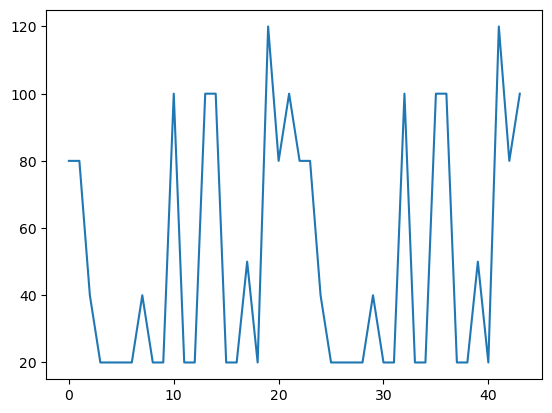

In [130]:
plt.plot(merge_fert["N"])

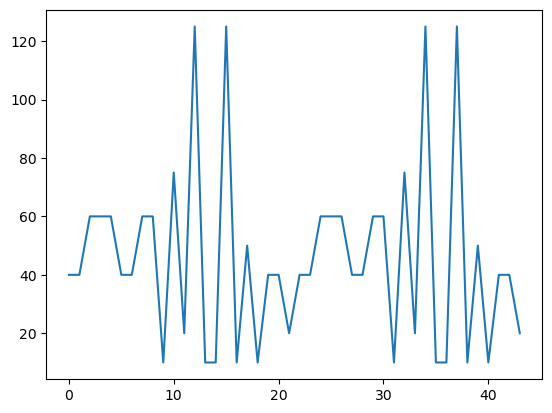

In [132]:
plt.plot(merge_fert["P"])

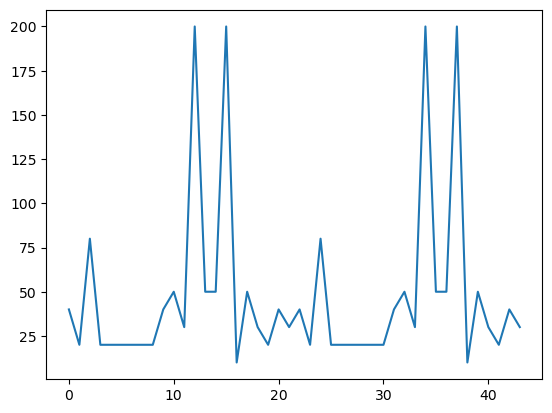

In [134]:
plt.plot(merge_fert["K"])

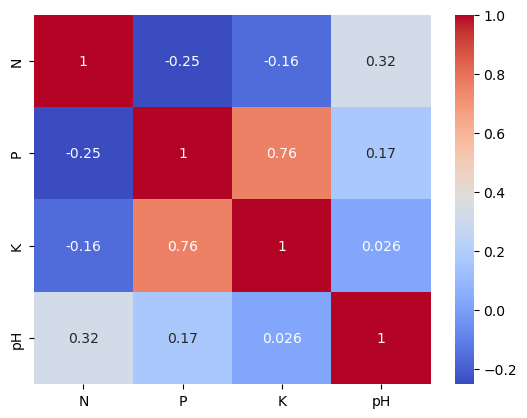

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = merge_fert.select_dtypes(include=["number"])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [165]:
sns.heatmap(merge_fert.corr(),annot=True)

ValueError: could not convert string to float: 'rice'

In [138]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [140]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = pd.concat([temp, pd.DataFrame([d])], ignore_index=True)

In [142]:
temp

,N,P,K
0,75,48,37
1,87,52,45
2,96,46,38
3,80,55,37
4,93,42,42
...,...,...,...
4395,120,25,26
4396,93,37,28
4397,120,28,32
4398,107,27,32


In [143]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [144]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,75,48,37
1,1,21.770462,80.319644,7.038096,226.655537,rice,87,52,45
2,2,23.004459,82.320763,7.840207,263.964248,rice,96,46,38
3,3,26.491096,80.158363,6.980401,242.864034,rice,80,55,37
4,4,20.130175,81.604873,7.628473,262.717340,rice,93,42,42
...,...,...,...,...,...,...,...,...,...
4395,4395,26.774637,66.413269,6.780064,177.774507,coffee,120,25,26
4396,4396,27.417112,56.636362,6.086922,127.924610,coffee,93,37,28
4397,4397,24.131797,67.225123,6.362608,173.322839,coffee,120,28,32
4398,4398,26.272418,52.127394,6.758793,127.175293,coffee,107,27,32


In [149]:
del merge_crop['Unnamed: 0']

In [151]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,75,48,37
1,21.770462,80.319644,7.038096,226.655537,rice,87,52,45
2,23.004459,82.320763,7.840207,263.964248,rice,96,46,38
3,26.491096,80.158363,6.980401,242.864034,rice,80,55,37
4,20.130175,81.604873,7.628473,262.717340,rice,93,42,42
...,...,...,...,...,...,...,...,...
4395,26.774637,66.413269,6.780064,177.774507,coffee,120,25,26
4396,27.417112,56.636362,6.086922,127.924610,coffee,93,37,28
4397,24.131797,67.225123,6.362608,173.322839,coffee,120,28,32
4398,26.272418,52.127394,6.758793,127.175293,coffee,107,27,32


In [153]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [155]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [157]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [159]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,75,48,37,20.879744,82.002744,6.502985,202.935536,rice
1,87,52,45,21.770462,80.319644,7.038096,226.655537,rice
2,96,46,38,23.004459,82.320763,7.840207,263.964248,rice
3,80,55,37,26.491096,80.158363,6.980401,242.864034,rice
4,93,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [161]:
df.shape

(4400, 8)